# Problem Statement 
Build a regression model using regularization to predict the actual value of the prospective properties to decide whether to invest or not invest in them

The outcome of this assignment would be to


*   List down the variables that are significant in predicting the price of a house
*   Mention how well those variables describe the price of a house




# Solution Aproach
The solution to this problem statement contains the following steps





*   Understand the given dataset and do EDA
*   Data cleaning
*   Data preparation
*   Model building and evaluation

Model building and evaluation contains the following procedure


*   Automatic feature elimination method RFE will performed to get the important predictors
*   First Linear Regression will be performed on both train and test data with only the important predictors and the metrics parameters will be collected
*   Ridge and Lasso normalization will be applied on the train and test dataset. The optimum value of alpha, important predictor variables and the metrics parameters will be examined. This is required to answer one part of the Question 1 as part of this assignment
*   The alpha values of Ridge and Lasso will be doubled and the Ridge and Lasso normalization will be agian applied on both train and test data set. Changes in the model and the important predictor variables will be examined. This is required to answer the other part of the Question 1 as part of this assignment


*   The five important parameter identified through Lasso coefficients will be dropped from the dataset and the model will be built again and evaluated. The most important predictor variables will be identified again



# Import required libraries and read the data set file

In [1034]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
import warnings
warnings.filterwarnings('ignore')

In [1035]:
house_df = pd.read_csv("train.csv")

# Peform data inspection and EDA on the given data set

In [1036]:
# Observe the number of rows and columns present in the data set
house_df.shape

(1460, 81)

In [1037]:
# list down initial few rows
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1038]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1039]:
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Plot various graphs at random to observe the relationship between the variables

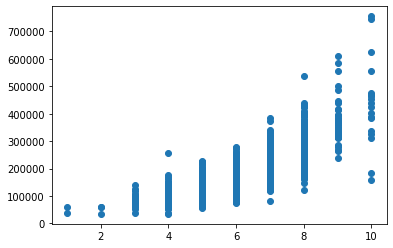

In [1040]:
# Plot the scatter plot of 'SalePrice Vs 'OverallQual
plt.scatter(house_df.OverallQual, house_df.SalePrice)
plt.show()

In [1041]:
#Plot the scatter plot of 'SalePrice' Vs 'MSSubClass'

<function matplotlib.pyplot.show>

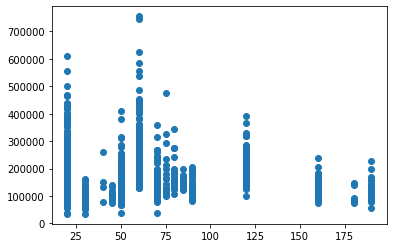

In [1042]:
plt.scatter(house_df.MSSubClass, house_df.SalePrice)
plt.show

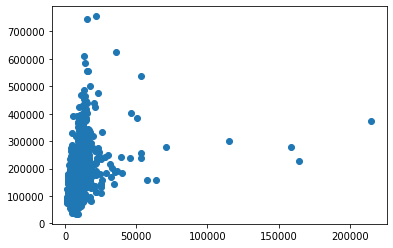

In [1043]:
plt.scatter(house_df.LotArea, house_df.SalePrice)
plt.show()

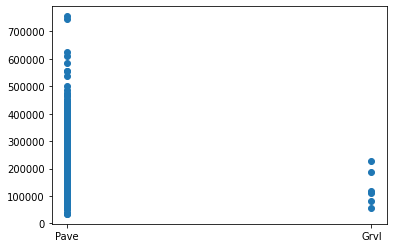

In [1044]:
plt.scatter(house_df.Street, house_df.SalePrice)
plt.show()

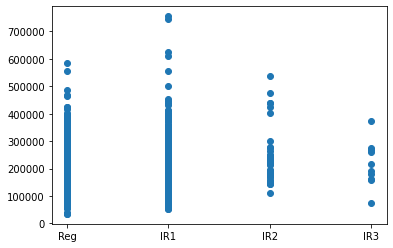

In [1045]:
plt.scatter(house_df.LotShape, house_df.SalePrice)
plt.show()

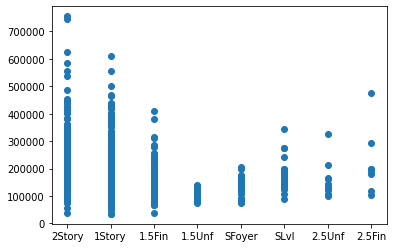

In [1046]:
plt.scatter(house_df.HouseStyle, house_df.SalePrice)
plt.show()

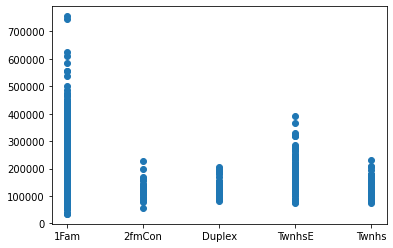

In [1047]:
plt.scatter(house_df.BldgType, house_df.SalePrice)
plt.show()

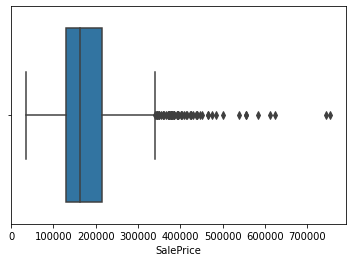

In [1048]:
sns.boxplot(house_df.SalePrice)
plt.show()

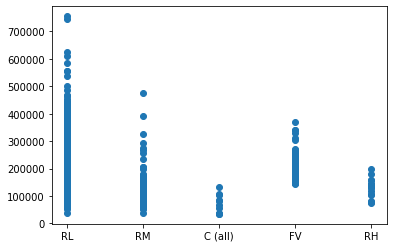

In [1049]:
plt.scatter(house_df.MSZoning, house_df.SalePrice)
plt.show()

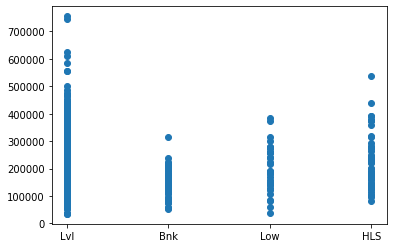

In [1050]:
plt.scatter(house_df.LandContour, house_df.SalePrice)
plt.show()

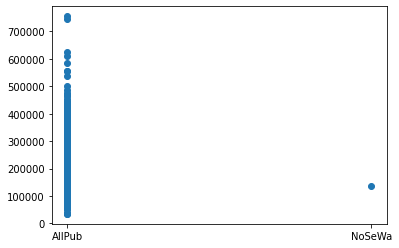

In [1051]:
plt.scatter(house_df.Utilities, house_df.SalePrice)
plt.show()

In [1052]:
# Identify both categorical and numerical variables and store them separate variables
categorical = [col for col in house_df.columns if house_df[col].dtype == object]
numerical = [col for col in house_df.columns if house_df[col].dtype  != object]

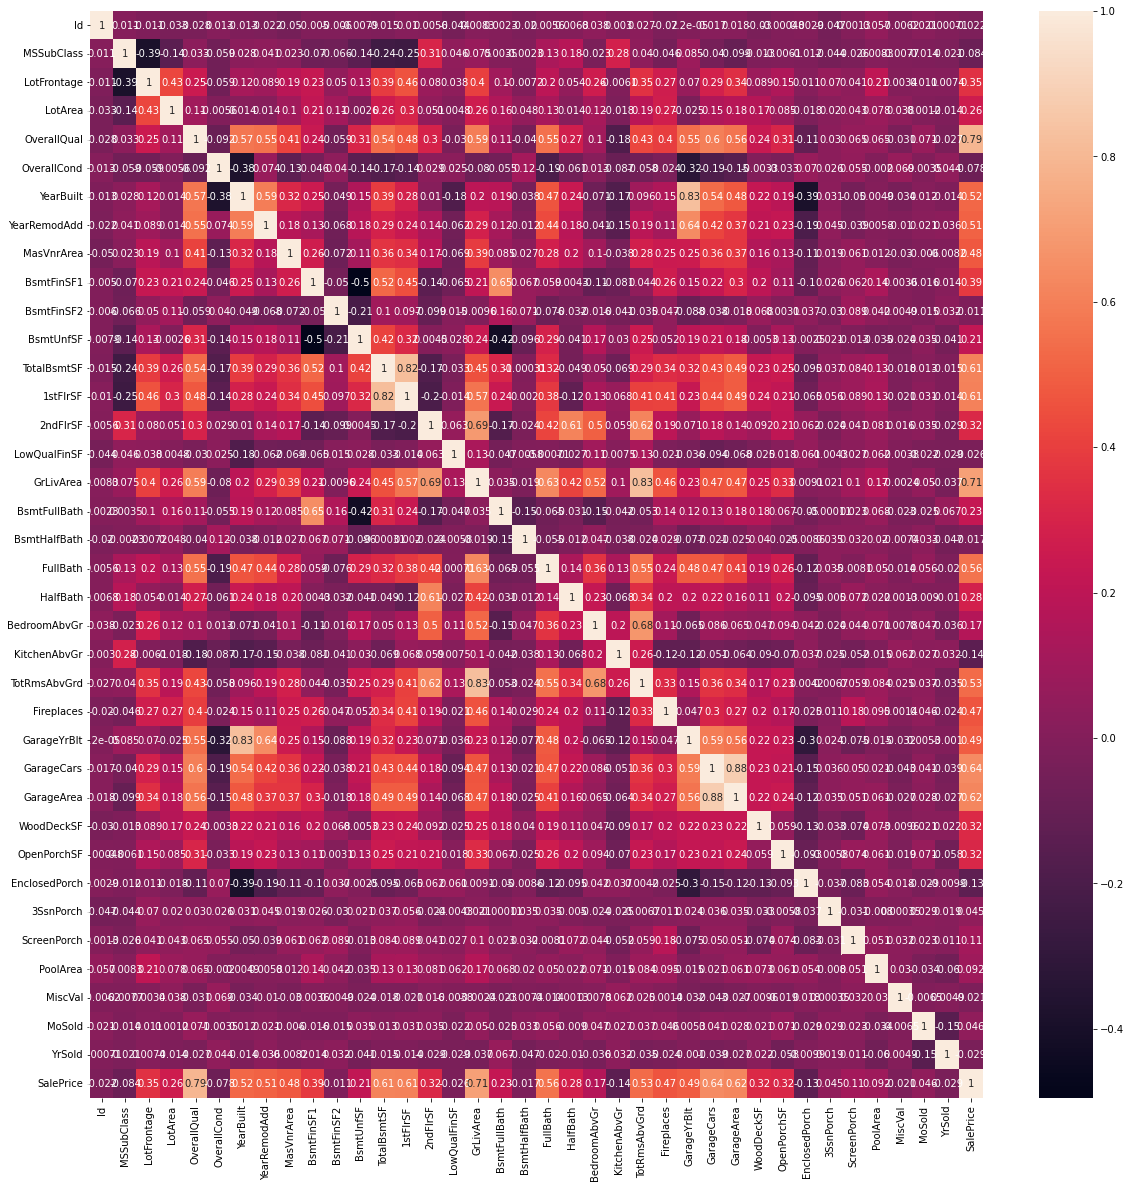

In [1053]:
plt.figure(figsize = (20, 20))
sns.heatmap(house_df[numerical].corr(), annot=True)
plt.show()

In [1054]:
house_df[numerical].corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

From the above correlation table it is clear that the predictor variables OverallQual, GrLivArea, GrLivArea,GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd,MasVnrArea have got high positive correlation in the decreasing order with the output variable SalePrice

# Perform missing values treatment

Find the missing values in each column and perform
1. drop the columns them if it is more than 70%
2. drop the categorical columns if a value in it is repeated more than 70 percent

In [1055]:
# Identify both categorical and numerical variables and store them separate variables
#categorical = [col for col in house_df.columns if house_df[col].dtype == object]
#numerical = [col for col in house_df.columns if house_df[col].dtype  != object]

In [1056]:
# Drop the variable 'Id' as it doesn't have impact on the analysis
house_df.drop('Id', axis=1, inplace=True)

In [1057]:
# remove the column Id from the numerical variables list
numerical.remove('Id')

In [1058]:
numer_miss_val_perc = house_df[numerical].isnull().sum() / house_df.shape[0]
print(numer_miss_val_perc[numer_miss_val_perc > 0.7])
print(numer_miss_val_perc[numer_miss_val_perc > 0.5])
print(numer_miss_val_perc[numer_miss_val_perc > 0.1])
print(numer_miss_val_perc[numer_miss_val_perc > 0.001])

Series([], dtype: float64)
Series([], dtype: float64)
LotFrontage    0.177397
dtype: float64
LotFrontage    0.177397
MasVnrArea     0.005479
GarageYrBlt    0.055479
dtype: float64


In [1059]:
# Fill the missing values with median
house_df['LotFrontage'].fillna(house_df['LotFrontage'].median(), inplace=True)
house_df['GarageYrBlt'].fillna(house_df.GarageYrBlt.median(), inplace=True)
house_df['MasVnrArea'].fillna(house_df.MasVnrArea.median(), inplace=True)

In [1060]:
# Again check are there any missing values left
house_df[numerical].isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [1061]:
# Convert the year of construction of the house, remodification and Garage built to its age

# Substract the year of house construction from the current year
from datetime import date
curr_year = date.today().year
age = curr_year - house_df.YearBuilt
#print(len(age), house_df.shape)
house_df['HouseAge'] = list(age)
age = curr_year - house_df.YearRemodAdd
house_df['RemodAge'] = list(age)
age = curr_year - house_df.GarageYrBlt
house_df['GarageAge'] = list(age)
#drop the columns 'YearBuilt', 'YearRemodAdd' 'GarageYrBlt'
cols_to_drop = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']
house_df.drop(cols_to_drop, axis=1, inplace=True)
# remove those columns from the numerical columns list
for col in cols_to_drop:
  numerical.remove(col)
house_df.shape

(1460, 80)

Perform outlier treatment

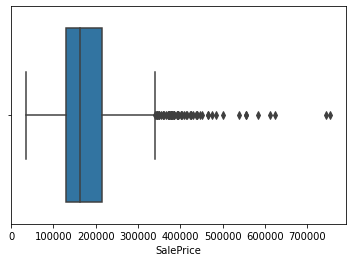

In [1062]:
# Draw the box plot for SalePrice
sns.boxplot(house_df.SalePrice)

In [1063]:
# Perform outlier treatment
Q1 = np.percentile(house_df.SalePrice, 25, interpolation='midpoint')
Q3 = np.percentile(house_df.SalePrice, 75, interpolation='midpoint')
IQR = Q3 - Q1
# Define the upper and lower bound and find the indexes in the data set that countain outlier values
upper_iqr = Q3 + 1.5 * IQR
lower_iqr = Q1 - 1.5 * IQR
print(upper_iqr, lower_iqr)
upper = np.where(house_df['SalePrice'] >= upper_iqr)
lower = np.where(house_df['SalePrice'] <= lower_iqr)
print(upper, lower)
outliers_indices = upper + lower
house_df.drop(outliers_indices[0], inplace=True)

340075.0 3875.0
(array([  11,   53,   58,  112,  151,  161,  178,  185,  224,  231,  278,
        309,  313,  320,  321,  336,  349,  378,  389,  440,  473,  477,
        481,  496,  515,  527,  585,  591,  608,  642,  644,  654,  661,
        664,  678,  688,  691,  702,  718,  769,  774,  798,  803,  825,
        877,  898,  987,  990, 1046, 1142, 1169, 1181, 1182, 1228, 1243,
       1267, 1268, 1353, 1373, 1388, 1437]),) (array([], dtype=int64),)


In [1064]:
#house_df.shape

In [1065]:
#Find the missing values in categoricl variabls and drop those columns that have got more than 70 percent missing values
categ_miss_val_perc = house_df[categorical].isnull().sum() / house_df.shape[0]
cols_to_delete = list(categ_miss_val_perc[categ_miss_val_perc > 0.8].to_dict().keys())
cols_to_delete


['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [1066]:
# house_df.shape

In [1067]:
# drop the columns that have got 80 percent similar values in a given column
house_df.drop(cols_to_delete, axis=1, inplace=True)

In [1068]:
#house_df.shape

In [1069]:
# remove those columns dropped from the categorical columns list
for col in cols_to_delete:
  categorical.remove(col)
len(categorical)

39

In [1070]:
# Find the percentage of a single value that is dominating in the column
col_max_values = {}
for col in categorical:
  col_max_values[col] = (house_df[col].value_counts().max()/house_df.shape[0])
  #col_max_values[col] = (house_df[categorical[col]].value_counts().max())/house_df.shape[0]
  #col_max_values[col] = house_df[categorical[col]].value_counts().max()
  #house_df[col].value_counts().max()



In [1071]:
cols_to_delete = []
print("Column Percentage of a value dominating")
for key in col_max_values.keys():
  #print(key, col_max_values[key])
  if col_max_values[key] > 0.70:
    print(key, col_max_values[key])
    cols_to_delete.append(key)
print("Total cols to drop ", len(cols_to_delete))

Column Percentage of a value dominating
MSZoning 0.7812723373838456
Street 0.995711222301644
LandContour 0.9013581129378128
Utilities 0.9992852037169406
LotConfig 0.7205146533238027
LandSlope 0.947819871336669
Condition1 0.8591851322373124
Condition2 0.9899928520371694
BldgType 0.82987848463188
RoofStyle 0.7998570407433881
RoofMatl 0.9835596854896355
ExterCond 0.875625446747677
BsmtCond 0.8963545389563974
BsmtFinType2 0.856325947105075
Heating 0.9778413152251608
CentralAir 0.9320943531093638
Electrical 0.9099356683345247
Functional 0.9292351679771265
GarageQual 0.8942101501072195
GarageCond 0.90421729807005
PavedDrive 0.9142244460328807
SaleType 0.8849177984274482
SaleCondition 0.8363116511794139
Total cols to drop  23


In [1072]:
# drop those categorical columns in which a single value in a column is present more than 70 percent
house_df.drop(cols_to_delete, axis=1, inplace=True)
#house_df.shape

In [1073]:
# remove the columns from the categorical columns list that are dropped
for col in cols_to_delete:
  categorical.remove(col)
len(categorical)

16

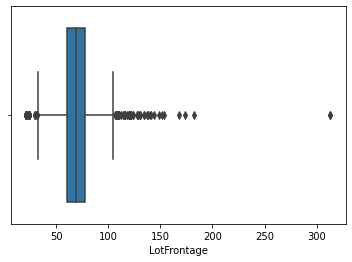

In [1074]:
#From the above print statements it is clear that only the columns 'LotFrontage' and 'GarageYrBlt' have got
# the missing values percentage of 0.183 and 0.057 (rounded off to 3 digits)
# We need to plot its distribution to find what method to be used for imputing it
# Delete this cell
sns.boxplot(house_df.LotFrontage)

In [1075]:
# delete this cell
numerical[6:10]

['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']

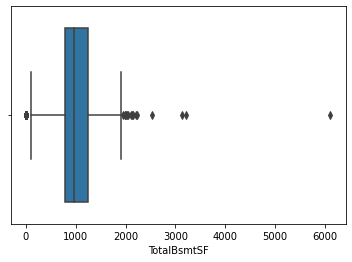

In [1076]:
#delete this cell
sns.boxplot(house_df.TotalBsmtSF)

In [1077]:
# Find the correlation among numerical variables
#house_df[numerical].corr()['SalePrice'].sort_values(ascending=False)

# Create Meaningful values for few of the categorical variables that have got NA as one of their values.

Few of the categorical variables have got values as 'NA'. They are actually not missing values but is being interpreted as missing values (NaN or nan) by the isnull().
They have got meaningful values. Like the column 'Alley' has got NA. It means 'No Alley Access'
Likewise there are other columns also that have got NA as one of their values. We need to impute them with meaningful values looking at the data dictionary so that they will not be interpreted as missing values by the pandas code

In [1078]:
# First identify those columns that will be resulting in having missing values as per the isnull()
mis_val_cols_categ = house_df[categorical].isnull().sum()
mis_val_cols_categ = mis_val_cols_categ[mis_val_cols_categ > 0]
#Display those categorical variables that have got missing values as per isnull()
cols = mis_val_cols_categ.to_dict()
cols

{'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtQual': 37,
 'FireplaceQu': 689,
 'GarageFinish': 81,
 'GarageType': 81,
 'MasVnrType': 7}

Drop the below categorical variables
FireplaceQu


In [1079]:
# Drop the below categorical variables
house_df.GarageFinish.value_counts()

Unf    602
RFn    409
Fin    307
Name: GarageFinish, dtype: int64

In [1080]:
house_df.shape

(1399, 53)

Replace the values 'NA" from each column with meaningful values refering the data dictionary. Below are the columns identified for this treatment
BsmtExposure, BsmtFinType1, BsmtQual, FirplaceQu, GarageFinish,  GarageType, MasVnrType



In [1081]:
#house_df[house_df.MasVnrType.isnull()].index

In [1082]:
#house_df.MasVnrType.value_counts()

In [1083]:
# columns related to Basement. Replace the missing values in these columns with value 'NoBsmt'
cols = ['BsmtExposure', 'BsmtFinType1', 'BsmtQual']
for col in cols:
  house_df[col].fillna('NoBsmt', inplace=True)

In [1084]:
house_df[cols].isnull().sum()

BsmtExposure    0
BsmtFinType1    0
BsmtQual        0
dtype: int64

In [1085]:

house_df.FireplaceQu.fillna('NOFPLC', inplace=True)
house_df.FireplaceQu.value_counts()

NOFPLC    689
Gd        340
TA        303
Fa         33
Po         20
Ex         14
Name: FireplaceQu, dtype: int64

In [1086]:
cols = ['GarageType', 'GarageFinish']
for col in cols:
  house_df[col].fillna('NoGarage', inplace=True)
house_df[cols].isnull().sum()

GarageType      0
GarageFinish    0
dtype: int64

In [1087]:
# For column MasVnrType fill the NAs with value mode which is 'None'
house_df.MasVnrType.fillna('None', inplace=True)
house_df.MasVnrType.isnull().sum()

0

In [1088]:
house_df[categorical].isnull().sum()

LotShape        0
Neighborhood    0
HouseStyle      0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
ExterQual       0
Foundation      0
BsmtQual        0
BsmtExposure    0
BsmtFinType1    0
HeatingQC       0
KitchenQual     0
FireplaceQu     0
GarageType      0
GarageFinish    0
dtype: int64

In [1089]:
house_df[numerical].isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

# Data preparation

Create dummy variables for the categorical variables

In [1090]:
dummy_df = pd.get_dummies(house_df[categorical], drop_first = True)

In [1091]:
dummy_df.shape

(1399, 109)

In [1092]:
len(categorical)

16

In [1093]:
# Drop the original categorical variables that were used to create the dummy variables as we don't need them
house_df.drop(categorical, axis=1, inplace=True)

In [1094]:
categorical = list(categorical)
categorical

['LotShape',
 'Neighborhood',
 'HouseStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish']

In [1095]:
dummy_df.head()

,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,...,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf
0,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0


In [1096]:
new_df = pd.concat([house_df, dummy_df], axis=1)

In [1097]:
new_df.shape

(1399, 146)

All together there are 1399 rows X 146 columns in the combined data frame new_df

In [1098]:
mis_columns = new_df.isnull().sum()
len(mis_columns[mis_columns != 0])

0

In [1099]:
new_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,1,0,0,0,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,1,1,0,0,0,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,1,1,0,0,0,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,0,0,0,0,0,1,0,0,0,1
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,1,1,0,0,0,0,0,0,1,0


In [1100]:
new_cols = new_df.columns

# Model building and evaluation
Perform


*   Scaling of values in the variables
*   Auto feature elimination (RFE)
*   Linear Rigression, Ridge and Lasso normalization
*   Comparision of coefficients, R2 Score, RSS, MSE and RMSE among Linear Regression, Ridge and Lasso





In [1101]:
# Do the scaling using MinMaxScaling
scaler = MinMaxScaler()

# Split the dataset into train and test

In [1102]:
df_train, df_test = train_test_split(new_df, test_size=0.3, train_size=0.7, random_state = True)

In [1103]:
#df_train_numeric = df_train[numerical]
#df_train_numeric = df_train


In [1104]:
df_test['SalePrice'].head()

572    224500
793    225000
936    184900
428    195400
787    233000
Name: SalePrice, dtype: int64

In [1105]:
#df_test_numeric = df_test[numerical]
#df_test_numeric = df_test

In [1106]:
df_train.shape

(979, 146)

In [1107]:
df_test.shape

(420, 146)

In [1108]:
#df_train_numeric.shape

In [1109]:
#df_test_numeric.shape

In [1110]:
#df_train_numeric.head()

In [1111]:
cols = df_train.columns

In [1112]:
df_train = pd.DataFrame(scaler.fit_transform(df_train))

In [1113]:
df_train.columns = cols

In [1114]:
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf
0,0.588235,0.075342,0.011521,0.666667,0.500,0.014350,0.002835,0.0,0.664545,0.224714,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.235294,0.167808,0.045605,0.666667,0.500,0.000000,0.113749,0.0,0.133692,0.149755,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.235294,0.297945,0.074180,0.777778,0.500,0.118386,0.000000,0.0,0.547013,0.182815,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.176471,0.287671,0.043891,0.222222,0.125,0.000000,0.000000,0.0,0.496082,0.165794,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.235294,0.164384,0.046401,0.666667,0.500,0.000000,0.123140,0.0,0.123898,0.155155,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [1115]:
y_train = df_train.pop('SalePrice')

In [1116]:
df_train.shape

(979, 145)

In [1117]:
y_train.shape

(979,)

In [1118]:
X_train = df_train
X_train.shape

(979, 145)

In [1119]:
df_test = pd.DataFrame(scaler.transform(df_test))

In [1120]:
df_test.columns = cols

In [1121]:
df_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf
0,0.235294,0.212329,0.072594,0.666667,0.5,0.000000,0.000000,0.0,0.414300,0.138462,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.188356,0.048102,0.777778,0.5,0.125561,0.000000,0.0,0.732615,0.244845,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.157534,0.053765,0.666667,0.5,0.000000,0.147590,0.0,0.167973,0.192471,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000000,0.147260,0.033435,0.666667,0.5,0.096861,0.117647,0.0,0.266405,0.197709,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.235294,0.188356,0.054126,0.666667,0.5,0.000000,0.116230,0.0,0.146915,0.156465,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [1122]:
y_test = df_test.pop('SalePrice')

In [1123]:
X_test = df_test

In [1124]:
y_test.shape

(420,)

In [1125]:
X_test.shape

(420, 145)

In [1126]:
X_train.shape

(979, 145)

# Perform RFE

In [1127]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [1128]:
##lr = LogisticRegression()
lr = LinearRegression()


In [1129]:
rfe = RFE(lr, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [1130]:
rfe_tbl  = {'Vars': X_train.columns,
            'RFE_Support':rfe.support_,
            'Rankig':rfe.ranking_
           }

rfe_df = pd.DataFrame(rfe_tbl ,columns = ['Vars', 'RFE_Support', 'Ranking'])

In [1131]:
rfe_df['Ranking'] = rfe.ranking_

In [1132]:
rfe_df.head(5)

,Vars,RFE_Support,Ranking
0,MSSubClass,True,1
1,LotFrontage,True,1
2,LotArea,True,1
3,OverallQual,True,1
4,OverallCond,True,1


In [1133]:
rfe_df = rfe_df[rfe_df['RFE_Support'] == True]

In [1134]:
rfe_df.shape

(15, 3)

In [1135]:
#cols = list(rfe_df['Vars'].values)
#cols

# Perform Linear Regression

In [1136]:
cols = list(rfe_df['Vars'].values)
cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'GrLivArea',
 'BsmtFullBath',
 'GarageCars',
 'PoolArea',
 'HouseAge',
 'LotShape_IR3',
 'Neighborhood_Crawfor',
 'Neighborhood_NridgHt',
 'Exterior1st_BrkComm',
 'Exterior2nd_Other']

In [1137]:
# store this in temp just for backup
temp_X_train = X_train
temp_X_test = X_test

In [1138]:
X_train = X_train[cols]
X_test = X_test[cols]

In [1139]:
lr.fit(X_train, y_train)

LinearRegression()

In [1140]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

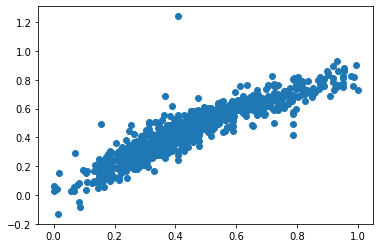

In [1141]:
plt.scatter(y_train, y_pred_train)
plt.show()

In [1142]:
metric_lr = []
metric_lr.append(r2_score(y_train, y_pred_train))

In [1143]:
metric_lr.append(r2_score(y_test, y_pred_test))

In [1144]:
metric_lr.append(np.sum(np.square(y_train - y_pred_train)))
metric_lr.append(np.sum(np.square(y_test - y_pred_test)))
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
metric_lr.append(mse_train)
metric_lr.append(mse_test)
metric_lr.append(mse_train ** 0.5)
metric_lr.append(mse_test ** 0.5)
metric_lr

[0.8421078105333886,
 0.7811695594201672,
 5.697741452431157,
 3.6318906459241136,
 0.005819960625568087,
 0.008647358680771699,
 0.07628866642934641,
 0.09299117528438759]

In [1145]:
print(lr.intercept_)
print(lr.coef_)

-0.04879122019992693
[-0.11022817 -0.12403607  0.35984919  0.43038378  0.14019696  0.87999671
  0.11024147  0.13429425 -0.15663197 -0.24737141 -0.11527462  0.11108252
  0.09904654 -0.19118385  0.19587768]


In [1146]:
train_residual = y_train - y_pred_train
test_residual = y_test - y_pred_test

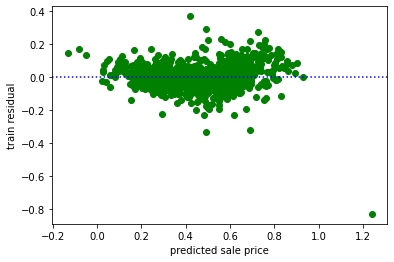

In [1147]:
train_residual = y_train - y_pred_train
plt.scatter(y_pred_train, train_residual, color='green' )
plt.axhline(y=0, color="blue", linestyle =':')
plt.xlabel('predicted sale price')
plt.ylabel('train residual')
plt.show()

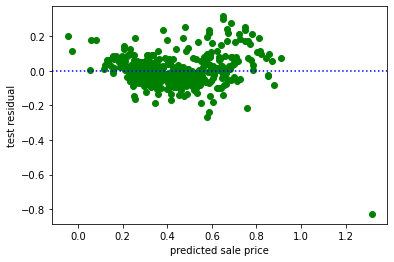

In [1148]:
test_residual = y_test - y_pred_test
plt.scatter(y_pred_test, test_residual, color='green' )
plt.axhline(y=0, color="blue", linestyle =':')
plt.xlabel('predicted sale price')
plt.ylabel('test residual')
plt.show()

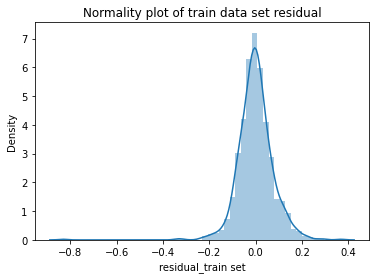

In [1149]:
# Distribution of errors for train data set
p = sns.distplot(train_residual, kde=True)
p = plt.title('Normality plot of train data set residual')
plt.xlabel("residual_train set")
plt.show()

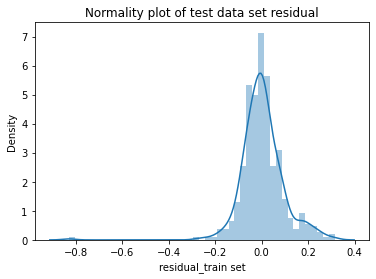

In [1150]:
# Distribution of errors for test data set
p = sns.distplot(test_residual, kde=True)
p = plt.title('Normality plot of test data set residual')
plt.xlabel("residual_train set")
plt.show()

Create metrics comparison table for comparing the important parameters coming out of Ridge and Lasso methods with single and double the optimum value of the alpha
It is required for answering the questions asked as part of this assignment

In [1151]:
#Create a table to compare the metrics of important parameters with optimum value of alpha and double
# the value of alpha for both ridge and lasso respectively
indices = ['R2-Score-Train', 'R2-Score-Test', 'RSS-Train', 'RSS-Test', 'MSE-Train', 'MSE-Test', 'RMSE-Train', 'RMSE-Test']
#cols = ['RidgeSnglAlpha', 'LassoSnglAlpha', 'RidgeDblAplpha', 'LassoDblAlpha']
metric_cmp_tbl = pd.DataFrame(index = indices)
metric_cmp_tbl['LR'] = metric_lr

In [1152]:
# create a table to compare the co-efficients of each predictor variable for Ridge and Lasso with 
# optimum value of alpha and double the value of it
#cols = ['Predictors', 'RidgeSnglAlpha', 'LassoSnglAlpha', 'RidgeDblAlpha', 'LassoDblAlpha']
coef_cmp_tbl = pd.DataFrame(index = X_train.columns)
coef_cmp_tbl['LinearRegression'] = lr.coef_

# Perform Regularization using Ridge

In [1153]:
from sklearn.model_selection import GridSearchCV
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1154]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.3}


In [1155]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 0.3
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-0.10539016 -0.08894197  0.32081074  0.4386691   0.13653984  0.82764335
  0.11063524  0.14284482 -0.13270162 -0.2405375  -0.10780752  0.1119917
  0.09714039 -0.14717625  0.15195464]


In [1156]:
coef_cmp_tbl['RidgeSnglAlpha'] = ridge.coef_
coef_cmp_tbl

,LinearRegression,RidgeSnglAlpha
MSSubClass,-0.110228,-0.105390
LotFrontage,-0.124036,-0.088942
LotArea,0.359849,0.320811
OverallQual,0.430384,0.438669
OverallCond,0.140197,0.136540
GrLivArea,0.879997,0.827643
BsmtFullBath,0.110241,0.110635
GarageCars,0.134294,0.142845
PoolArea,-0.156632,-0.132702
HouseAge,-0.247371,-0.240538


In [1157]:
# do the prediction on both train and test data set
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

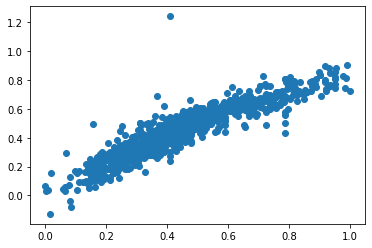

In [1158]:
plt.scatter(y_train, y_pred_train)
plt.show()

In [1159]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
metric_ridge = []
metric_ridge.append(r2_score(y_train, y_pred_train))
metric_ridge.append(r2_score(y_test, y_pred_test))
metric_ridge.append(np.sum(np.square(y_train - y_pred_train)))
metric_ridge.append(np.sum(np.square(y_test - y_pred_test)))
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
metric_ridge.append(mse_train)
metric_ridge.append(mse_test)
metric_ridge.append(mse_train ** 0.5)
metric_ridge.append(mse_test ** 0.5)
metric_ridge

[0.8414930846967497,
 0.7863499937444531,
 5.719924619902138,
 3.5459118812040624,
 0.005842619632177874,
 0.008442647336200149,
 0.07643703050340113,
 0.09188387963184919]

In [1160]:
metric_cmp_tbl['RidgeSnglAlpha'] = metric_ridge
metric_cmp_tbl

,LR,RidgeSnglAlpha
R2-Score-Train,0.842108,0.841493
R2-Score-Test,0.781170,0.786350
RSS-Train,5.697741,5.719925
RSS-Test,3.631891,3.545912
MSE-Train,0.005820,0.005843
MSE-Test,0.008647,0.008443
RMSE-Train,0.076289,0.076437
RMSE-Test,0.092991,0.091884


Prepare a table containing the predictors and their coefficient values. This will help us to identify the most important predictors

In [1161]:
ridge_coef_tbl = {'Predictors':X_train.columns, 'Coefficients':ridge.coef_}
ridge_coef_tbl = pd.DataFrame(ridge_coef_tbl, columns = ['Predictors', 'Coefficients'])

In [1162]:
ridge_coef_tbl

,Predictors,Coefficients
0,MSSubClass,-0.105390
1,LotFrontage,-0.088942
2,LotArea,0.320811
3,OverallQual,0.438669
4,OverallCond,0.136540
5,GrLivArea,0.827643
6,BsmtFullBath,0.110635
7,GarageCars,0.142845
8,PoolArea,-0.132702
9,HouseAge,-0.240538


In [1163]:
top_ridge_coef_tbl = ridge_coef_tbl.sort_values(by='Coefficients', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')
#new_beta = betas.sort_values(by='Lasso', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

In [1164]:
top_ridge_coef_tbl.head(15)

,Predictors,Coefficients
5,GrLivArea,0.827643
3,OverallQual,0.438669
2,LotArea,0.320811
14,Exterior2nd_Other,0.151955
7,GarageCars,0.142845
4,OverallCond,0.136540
11,Neighborhood_Crawfor,0.111992
6,BsmtFullBath,0.110635
12,Neighborhood_NridgHt,0.097140
1,LotFrontage,-0.088942


# Perform normalization using Lasso

In [1165]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1166]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [1167]:
alpha = 0.0001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
print(lasso.coef_)

[-0.10403974 -0.07742568  0.30740049  0.43582953  0.13491283  0.85186199
  0.1095291   0.13762929 -0.11925846 -0.24100163 -0.10404874  0.10845582
  0.09514269 -0.09424522  0.10058866]


In [1168]:
coef_cmp_tbl['LassoSnglAlpha'] = lasso.coef_
coef_cmp_tbl

,LinearRegression,RidgeSnglAlpha,LassoSnglAlpha
MSSubClass,-0.110228,-0.105390,-0.104040
LotFrontage,-0.124036,-0.088942,-0.077426
LotArea,0.359849,0.320811,0.307400
OverallQual,0.430384,0.438669,0.435830
OverallCond,0.140197,0.136540,0.134913
GrLivArea,0.879997,0.827643,0.851862
BsmtFullBath,0.110241,0.110635,0.109529
GarageCars,0.134294,0.142845,0.137629
PoolArea,-0.156632,-0.132702,-0.119258
HouseAge,-0.247371,-0.240538,-0.241002


From the above coefficient comparision table it is clear that Lasso has resulted in lesser values of coefficients for same variables made use in ridge normalization

Prepare a table to store the column names and the coefficient values for lasso

In [1169]:
lasso_col_coeff = {'Predictors':X_train.columns, 'Coefficients':lasso.coef_}
lasso_coef_tbl = pd.DataFrame(lasso_col_coeff, columns = ['Predictors', 'Coefficients'])

In [1170]:
top_lasso_coef_tbl = lasso_coef_tbl
top_lasso_coef_tbl['Coefficients'] = abs(top_lasso_coef_tbl['Coefficients'])

In [1171]:
top_lasso_coef_tbl = top_lasso_coef_tbl.sort_values(by='Coefficients', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

In [1172]:
top_lasso_coef_tbl.head(15)

,Predictors,Coefficients
5,GrLivArea,0.851862
3,OverallQual,0.435830
2,LotArea,0.307400
9,HouseAge,0.241002
7,GarageCars,0.137629
4,OverallCond,0.134913
8,PoolArea,0.119258
6,BsmtFullBath,0.109529
11,Neighborhood_Crawfor,0.108456
10,LotShape_IR3,0.104049


In [1173]:
ridge_lasso_coef_tbl = pd.DataFrame()


In [1174]:
ridge_lasso_coef_tbl['Predictors'] = X_train.columns
ridge_lasso_coef_tbl['Ridge_Coefficients'] = ridge_coef_tbl['Coefficients']
ridge_lasso_coef_tbl['Lasso_Coefficients'] = top_lasso_coef_tbl['Coefficients']

In [1175]:
ridge_lasso_coef_tbl

,Predictors,Ridge_Coefficients,Lasso_Coefficients
0,MSSubClass,-0.105390,0.104040
1,LotFrontage,-0.088942,0.077426
2,LotArea,0.320811,0.307400
3,OverallQual,0.438669,0.435830
4,OverallCond,0.136540,0.134913
5,GrLivArea,0.827643,0.851862
6,BsmtFullBath,0.110635,0.109529
7,GarageCars,0.142845,0.137629
8,PoolArea,-0.132702,0.119258
9,HouseAge,-0.240538,0.241002


In [1176]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric_lasso = []
metric_lasso.append(r2_score(y_train, y_pred_train))
metric_lasso.append(r2_score(y_test, y_pred_test))

metric_lasso.append(np.sum(np.square(y_train - y_pred_train)))
metric_lasso.append(np.sum(np.square(y_test - y_pred_test)))
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
metric_lasso.append(mse_train)
metric_lasso.append(mse_test)
metric_lasso.append(mse_train ** 0.5)
metric_lasso.append(mse_test ** 0.5)
metric_lasso

[0.8410649455504313,
 0.7871627156131379,
 5.735374568184108,
 3.532423278134066,
 0.005858400988952102,
 0.00841053161460492,
 0.07654019198402956,
 0.09170895056975038]

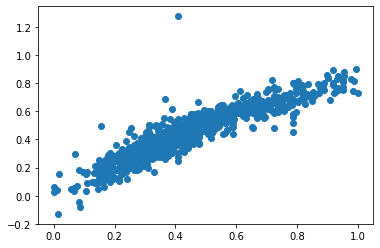

In [1177]:
plt.scatter(y_train, y_pred_train)
plt.show()

In [1178]:
metric_cmp_tbl['LassoSnglAlpha'] = metric_lasso
metric_cmp_tbl

,LR,RidgeSnglAlpha,LassoSnglAlpha
R2-Score-Train,0.842108,0.841493,0.841065
R2-Score-Test,0.781170,0.786350,0.787163
RSS-Train,5.697741,5.719925,5.735375
RSS-Test,3.631891,3.545912,3.532423
MSE-Train,0.005820,0.005843,0.005858
MSE-Test,0.008647,0.008443,0.008411
RMSE-Train,0.076289,0.076437,0.076540
RMSE-Test,0.092991,0.091884,0.091709


In [1179]:
#Displays the coefficients of the columns considered for LR, Ridge and Lasso
coef_cmp_tbl

,LinearRegression,RidgeSnglAlpha,LassoSnglAlpha
MSSubClass,-0.110228,-0.105390,-0.104040
LotFrontage,-0.124036,-0.088942,-0.077426
LotArea,0.359849,0.320811,0.307400
OverallQual,0.430384,0.438669,0.435830
OverallCond,0.140197,0.136540,0.134913
GrLivArea,0.879997,0.827643,0.851862
BsmtFullBath,0.110241,0.110635,0.109529
GarageCars,0.134294,0.142845,0.137629
PoolArea,-0.156632,-0.132702,-0.119258
HouseAge,-0.247371,-0.240538,-0.241002


In [1180]:
metric_cmp_tbl

,LR,RidgeSnglAlpha,LassoSnglAlpha
R2-Score-Train,0.842108,0.841493,0.841065
R2-Score-Test,0.781170,0.786350,0.787163
RSS-Train,5.697741,5.719925,5.735375
RSS-Test,3.631891,3.545912,3.532423
MSE-Train,0.005820,0.005843,0.005858
MSE-Test,0.008647,0.008443,0.008411
RMSE-Train,0.076289,0.076437,0.076540
RMSE-Test,0.092991,0.091884,0.091709


# Observing the changes in the co-efficients after regularization

In [1181]:
coef_cmp_tbl

,LinearRegression,RidgeSnglAlpha,LassoSnglAlpha
MSSubClass,-0.110228,-0.105390,-0.104040
LotFrontage,-0.124036,-0.088942,-0.077426
LotArea,0.359849,0.320811,0.307400
OverallQual,0.430384,0.438669,0.435830
OverallCond,0.140197,0.136540,0.134913
GrLivArea,0.879997,0.827643,0.851862
BsmtFullBath,0.110241,0.110635,0.109529
GarageCars,0.134294,0.142845,0.137629
PoolArea,-0.156632,-0.132702,-0.119258
HouseAge,-0.247371,-0.240538,-0.241002


In [1182]:
metric_cmp_tbl

,LR,RidgeSnglAlpha,LassoSnglAlpha
R2-Score-Train,0.842108,0.841493,0.841065
R2-Score-Test,0.781170,0.786350,0.787163
RSS-Train,5.697741,5.719925,5.735375
RSS-Test,3.631891,3.545912,3.532423
MSE-Train,0.005820,0.005843,0.005858
MSE-Test,0.008647,0.008443,0.008411
RMSE-Train,0.076289,0.076437,0.076540
RMSE-Test,0.092991,0.091884,0.091709


# Rebuild the model with double the optimum value of alpha for both ridge and lasso to identify the changes in the model

This part of the code is required for answering the second part of the Question 1

"What will be the changes in the model when the optimum value of alpha for both ridge and lasso is doubled" and
"What will be most important predictor variables after the change is implemented"



In [1183]:
# create a data frame to store the metric of ridge and lasso after doubling the alpha values
row_idx = ['R2-Score-Train', 'R2-Score-Test', 'RSS-Train', 'RSS-Test', 'MSE-Train', 'MSE-Test', 'RMSE-Train', 'RMSE-Test']
metric_double_alpha = pd.DataFrame(index=row_idx)


In [1184]:
# The optimum value of alpha found for ridge is 0.3
#double the value of alpha from 0.3 to 0.6
alpha = 0.6
ridge = Ridge(alpha=alpha)

In [1185]:
ridge.fit(X_train, y_train)
print(ridge.coef_)

[-0.10148015 -0.06218797  0.29075308  0.4442565   0.13319214  0.78329427
  0.11059816  0.15008129 -0.11388231 -0.23512947 -0.10107973  0.11271218
  0.09570817 -0.11983855  0.12448411]


In [1186]:
coef_cmp_tbl['RidgeDblAlpha'] = ridge.coef_
coef_cmp_tbl

,LinearRegression,RidgeSnglAlpha,LassoSnglAlpha,RidgeDblAlpha
MSSubClass,-0.110228,-0.105390,-0.104040,-0.101480
LotFrontage,-0.124036,-0.088942,-0.077426,-0.062188
LotArea,0.359849,0.320811,0.307400,0.290753
OverallQual,0.430384,0.438669,0.435830,0.444257
OverallCond,0.140197,0.136540,0.134913,0.133192
GrLivArea,0.879997,0.827643,0.851862,0.783294
BsmtFullBath,0.110241,0.110635,0.109529,0.110598
GarageCars,0.134294,0.142845,0.137629,0.150081
PoolArea,-0.156632,-0.132702,-0.119258,-0.113882
HouseAge,-0.247371,-0.240538,-0.241002,-0.235129


In [1187]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)


In [1188]:
mtrc_dblalpha_ridge = []
mtrc_dblalpha_ridge.append(r2_score(y_train, y_pred_train))
mtrc_dblalpha_ridge.append(r2_score(y_test, y_pred_test))
mtrc_dblalpha_ridge.append(np.sum(np.square(y_train - y_pred_train)))
mtrc_dblalpha_ridge.append(np.sum(np.square(y_test - y_pred_test)))
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mtrc_dblalpha_ridge.append(mse_train)
mtrc_dblalpha_ridge.append(mse_test)
mtrc_dblalpha_ridge.append(mse_train ** 0.5)
mtrc_dblalpha_ridge.append(mse_test ** 0.5)
mtrc_dblalpha_ridge
#print(r2_train_lr)
#mtrc_dblalpha_ridge.append(r2_train_lr)

[0.8401178084832368,
 0.7891059137997283,
 5.7695532197508435,
 3.5001723568346605,
 0.005893312788305254,
 0.008333743706749192,
 0.07676791509677239,
 0.09128934059762504]

In [1189]:
metric_cmp_tbl['RidgeDblAlpha'] = mtrc_dblalpha_ridge
metric_cmp_tbl

,LR,RidgeSnglAlpha,LassoSnglAlpha,RidgeDblAlpha
R2-Score-Train,0.842108,0.841493,0.841065,0.840118
R2-Score-Test,0.781170,0.786350,0.787163,0.789106
RSS-Train,5.697741,5.719925,5.735375,5.769553
RSS-Test,3.631891,3.545912,3.532423,3.500172
MSE-Train,0.005820,0.005843,0.005858,0.005893
MSE-Test,0.008647,0.008443,0.008411,0.008334
RMSE-Train,0.076289,0.076437,0.076540,0.076768
RMSE-Test,0.092991,0.091884,0.091709,0.091289


In [1190]:
# The optimum value of alpha found for Lasso was .0001
#Perform the lasso regularization with double the alpha value 0.0002
alpha = 0.0002
lasso = Lasso(alpha=alpha)


In [1191]:
lasso.fit(X_train, y_train)
print(lasso.coef_)

[-0.09786871 -0.03082499  0.25494868  0.44118887  0.12960706  0.8238173
  0.10879865  0.14091773 -0.08189394 -0.23466975 -0.09283284  0.10583516
  0.09125054 -0.          0.00531418]


In [1192]:
coef_cmp_tbl['LassoDblAlpha'] = lasso.coef_
coef_cmp_tbl

,LinearRegression,RidgeSnglAlpha,LassoSnglAlpha,RidgeDblAlpha,LassoDblAlpha
MSSubClass,-0.110228,-0.105390,-0.104040,-0.101480,-0.097869
LotFrontage,-0.124036,-0.088942,-0.077426,-0.062188,-0.030825
LotArea,0.359849,0.320811,0.307400,0.290753,0.254949
OverallQual,0.430384,0.438669,0.435830,0.444257,0.441189
OverallCond,0.140197,0.136540,0.134913,0.133192,0.129607
GrLivArea,0.879997,0.827643,0.851862,0.783294,0.823817
BsmtFullBath,0.110241,0.110635,0.109529,0.110598,0.108799
GarageCars,0.134294,0.142845,0.137629,0.150081,0.140918
PoolArea,-0.156632,-0.132702,-0.119258,-0.113882,-0.081894
HouseAge,-0.247371,-0.240538,-0.241002,-0.235129,-0.234670


In [1193]:

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)


In [1194]:
mtrc_dblalpha_lasso = []
mtrc_dblalpha_lasso.append(r2_score(y_train, y_pred_train))
mtrc_dblalpha_lasso.append(r2_score(y_test, y_pred_test))
mtrc_dblalpha_lasso.append(np.sum(np.square(y_train - y_pred_train)))
mtrc_dblalpha_lasso.append(np.sum(np.square(y_test - y_pred_test)))
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mtrc_dblalpha_lasso.append(mse_train)
mtrc_dblalpha_lasso.append(mse_test)
mtrc_dblalpha_lasso.append(mse_train ** 0.5)
mtrc_dblalpha_lasso.append(mse_test ** 0.5)
mtrc_dblalpha_lasso

[0.8379657175781916,
 0.7905265310539995,
 5.84721417055848,
 3.476594620101348,
 0.005972639602204781,
 0.008277606238336543,
 0.07728285451641122,
 0.09098135104699502]

In [1195]:
metric_cmp_tbl['LassoDblAlpha'] = mtrc_dblalpha_lasso

In [1196]:
metric_cmp_tbl

,LR,RidgeSnglAlpha,LassoSnglAlpha,RidgeDblAlpha,LassoDblAlpha
R2-Score-Train,0.842108,0.841493,0.841065,0.840118,0.837966
R2-Score-Test,0.781170,0.786350,0.787163,0.789106,0.790527
RSS-Train,5.697741,5.719925,5.735375,5.769553,5.847214
RSS-Test,3.631891,3.545912,3.532423,3.500172,3.476595
MSE-Train,0.005820,0.005843,0.005858,0.005893,0.005973
MSE-Test,0.008647,0.008443,0.008411,0.008334,0.008278
RMSE-Train,0.076289,0.076437,0.076540,0.076768,0.077283
RMSE-Test,0.092991,0.091884,0.091709,0.091289,0.090981


From the above metric comparison table it is clear that with the alpha value doubled 
*   R2 score of train data  has reduced for both Ridge and Lasso
*   A slight increase in the R2 score on test data set for both Ridge and Lasso

*   The RSS, MSE and RMSE value have increased slightly with both Ridge and Lasso for the train data set and a slight reduction for the test data set



# Perform the regression again by dropping those top 5 predictor varaibles from the input data set

In [1197]:
# get the 5 top columns resulted from the table top_lasso_coef_tbl
cols_to_drop = list(top_lasso_coef_tbl.Predictors[0:5])
cols_to_drop

['GrLivArea', 'OverallQual', 'LotArea', 'HouseAge', 'GarageCars']

In [1198]:
upd_house_df = new_df.drop(cols_to_drop, axis=1)

In [1199]:
upd_house_df.shape

(1399, 141)

In [1200]:
df_train, df_test = train_test_split(upd_house_df, test_size=0.3, train_size=0.7, random_state = True)

In [1201]:
metric_cmp_tbl

,LR,RidgeSnglAlpha,LassoSnglAlpha,RidgeDblAlpha,LassoDblAlpha
R2-Score-Train,0.842108,0.841493,0.841065,0.840118,0.837966
R2-Score-Test,0.781170,0.786350,0.787163,0.789106,0.790527
RSS-Train,5.697741,5.719925,5.735375,5.769553,5.847214
RSS-Test,3.631891,3.545912,3.532423,3.500172,3.476595
MSE-Train,0.005820,0.005843,0.005858,0.005893,0.005973
MSE-Test,0.008647,0.008443,0.008411,0.008334,0.008278
RMSE-Train,0.076289,0.076437,0.076540,0.076768,0.077283
RMSE-Test,0.092991,0.091884,0.091709,0.091289,0.090981


In [1202]:
df_train.head()

,MSSubClass,LotFrontage,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf
229,120,43.0,5,16.0,16,0,1357,1373,1555,0,...,1,1,0,0,0,0,0,0,0,0
444,60,70.0,5,0.0,642,0,273,915,933,975,...,1,1,0,0,0,0,0,0,0,1
35,60,108.0,5,132.0,0,0,1117,1117,1132,1320,...,0,0,0,1,0,0,0,0,0,0
88,50,105.0,2,0.0,0,0,1013,1013,1013,0,...,0,0,0,0,0,0,1,1,0,0
244,60,69.0,5,0.0,695,0,253,948,1222,888,...,0,1,0,0,0,0,0,0,1,0


In [1203]:
cols= df_train.columns

In [1204]:
df_train = pd.DataFrame(scaler.fit_transform(df_train))

In [1205]:
df_train.columns = cols

In [1206]:
df_train.head()

,MSSubClass,LotFrontage,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf
0,0.588235,0.075342,0.500,0.014350,0.002835,0.0,0.664545,0.224714,0.280174,0.000000,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.235294,0.167808,0.500,0.000000,0.113749,0.0,0.133692,0.149755,0.137448,0.536304,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.235294,0.297945,0.500,0.118386,0.000000,0.0,0.547013,0.182815,0.183112,0.726073,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.176471,0.287671,0.125,0.000000,0.000000,0.0,0.496082,0.165794,0.155805,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.235294,0.164384,0.500,0.000000,0.123140,0.0,0.123898,0.155155,0.203763,0.488449,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [1207]:
df_test = pd.DataFrame(scaler.transform(df_test))

In [1208]:
df_test.columns = cols
df_test.head()

,MSSubClass,LotFrontage,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf
0,0.235294,0.212329,0.5,0.000000,0.000000,0.0,0.414300,0.138462,0.117485,0.465347,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.188356,0.5,0.125561,0.000000,0.0,0.732615,0.244845,0.266636,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.157534,0.5,0.000000,0.147590,0.0,0.167973,0.192471,0.198715,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000000,0.147260,0.5,0.096861,0.117647,0.0,0.266405,0.197709,0.200551,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.235294,0.188356,0.5,0.000000,0.116230,0.0,0.146915,0.156465,0.142726,0.620462,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [1209]:
y_train = df_train.pop('SalePrice')
X_train = df_train
y_test = df_test.pop('SalePrice')
X_test = df_test

# Perform RFE

In [1210]:
lr = LinearRegression()

In [1211]:
rfe = RFE(lr, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)
rfe_tbl  = {'Vars': X_train.columns,
            'RFE_Support':rfe.support_,
            'Rankig':rfe.ranking_
           }

In [1212]:
rfe_df = pd.DataFrame(rfe_tbl ,columns = ['Vars', 'RFE_Support', 'Ranking'])
rfe_df['Ranking'] = rfe.ranking_
rfe_df = rfe_df[rfe_df['RFE_Support'] == True]
rfe_df.shape

(15, 3)

# Perform Liner Regression on the new dataset after dropping the top 5 predictors resulted from Lasso normalization

In [1213]:
# select 15 columns resulted from performing RFE
cols = list(rfe_df['Vars'].values)
cols

['OverallCond',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'FullBath',
 'GarageArea',
 'WoodDeckSF',
 'PoolArea',
 'Neighborhood_Crawfor',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Exterior1st_BrkComm',
 'Exterior1st_Stucco']

In [1214]:
#create a backup of the dataset for safety purpose
temp_X_train = X_train
temp_X_test = X_test


In [1215]:
# create two tables upd_coef_cmp_tbl and upd_metric_cmp_tbl to store the
# coefficients and metrics of Linear Regression, Ridge and Lasso
upd_coef_cmp_tbl = pd.DataFrame(index = cols)
upd_metric_cmp_tbl = pd.DataFrame(index = indices)

In [1216]:
X_train = X_train[cols]
X_test = X_test[cols]

lr.fit(X_train, y_train)

LinearRegression()

In [1217]:
y_pred_train = lr.predict(X_train)

In [1218]:
y_pred_test = lr.predict(X_test)

In [1219]:
# Calculate R2-Score, RSS, MSE and RMSE for train dataset
metric_lr = []
metric_lr.append(r2_score(y_train, y_pred_train))
metric_lr.append(r2_score(y_test, y_pred_test))
metric_lr.append(np.sum(np.square(y_train - y_pred_train)))
metric_lr.append(np.sum(np.square(y_test - y_pred_test)))
#print(rss1_lr)
mse_train_lr = mean_squared_error(y_train, y_pred_train)
mse_test_lr = mean_squared_error(y_test, y_pred_test)
metric_lr.append(mse_train_lr)
metric_lr.append(mse_test_lr)
metric_lr.append(mse_train_lr ** 0.5)
metric_lr.append(mse_test_lr ** 0.5)
metric_lr

[0.7357002937667934,
 0.6723658980254397,
 9.537592690034646,
 5.437686032593106,
 0.009742178437216186,
 0.012946871506174063,
 0.09870247432165105,
 0.11378432012440934]

In [1220]:
upd_coef_cmp_tbl['LR'] = lr.coef_
upd_metric_cmp_tbl['LR'] = metric_lr

# Perform the Ridge normalization on the new data set after dropping top 5 important predictors resulted from Lasso

In [1221]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)   

In [1222]:
model_cv.fit(X_train, y_train) 
print(model_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 0.5}


In [1223]:
ridge = Ridge(alpha = 0.3)
alpha
ridge.fit(X_train, y_train)
#X_test = X_test[cols]
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)



In [1224]:
ridge.coef_

array([ 0.13055615,  0.5546421 ,  0.52166785,  0.23716912,  0.20033862,
        0.30356172,  0.12946542, -0.17080894,  0.12334131,  0.14814848,
        0.14849548,  0.09862333,  0.14866059, -0.17063279, -0.1193089 ])

In [1225]:
metric_ridge = []
metric_ridge.append(r2_score(y_train, y_pred_train))
metric_ridge.append(r2_score(y_test, y_pred_test))
metric_ridge.append(np.sum(np.square(y_train - y_pred_train)))
metric_ridge.append(np.sum(np.square(y_test - y_pred_test)))
#print(rss1_lr)
mse_train_lr = mean_squared_error(y_train, y_pred_train)
mse_test_lr = mean_squared_error(y_test, y_pred_test)
metric_ridge.append(mse_train_lr)
metric_ridge.append(mse_test_lr)
metric_ridge.append(mse_train_lr ** 0.5)
metric_ridge.append(mse_test_lr ** 0.5)
metric_ridge

[0.7352989220344031,
 0.6736139121433975,
 9.552076701974691,
 5.416972960001461,
 0.00975697313786996,
 0.012897554666670145,
 0.09877739183573314,
 0.11356740142607008]

In [1226]:
upd_coef_cmp_tbl['Ridge'] = ridge.coef_
upd_metric_cmp_tbl['Ridge'] = metric_ridge

# Perform Lasso normalization on the new data set after dropping top 5 predictors resulted from pervious Lasso

In [1227]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)   

In [1228]:
model_cv.fit(X_train, y_train) 
print(model_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 0.0001}


In [1229]:
lasso = Lasso(alpha = 0.0001)
alpha
lasso.fit(X_train, y_train)
#X_test = X_test[cols]
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)



In [1230]:
lasso.coef_

array([ 0.12808021,  0.5768816 ,  0.52503662,  0.24042055,  0.19711161,
        0.30093422,  0.12626618, -0.15833642,  0.12020462,  0.14419796,
        0.14592263,  0.09716017,  0.1434376 , -0.12662752, -0.11658346])

In [1231]:
metric_lasso = []
metric_lasso.append(r2_score(y_train, y_pred_train))
metric_lasso.append(r2_score(y_test, y_pred_test))
metric_lasso.append(np.sum(np.square(y_train - y_pred_train)))
metric_lasso.append(np.sum(np.square(y_test - y_pred_test)))
#print(rss1_lr)
mse_train_lr = mean_squared_error(y_train, y_pred_train)
mse_test_lr = mean_squared_error(y_test, y_pred_test)
metric_lasso.append(mse_train_lr)
metric_lasso.append(mse_test_lr)
metric_lasso.append(mse_train_lr ** 0.5)
metric_lasso.append(mse_test_lr ** 0.5)
metric_lasso

[0.7351445894822017,
 0.675594327159916,
 9.557645989366975,
 5.384104357468454,
 0.009762661889036746,
 0.012819296089210603,
 0.0988061834554738,
 0.11322233034702388]

In [1232]:
upd_coef_cmp_tbl['Lasso'] = lasso.coef_
upd_metric_cmp_tbl['Lasso'] = metric_lasso

In [1233]:
upd_coef_cmp_tbl.sort_values(by='Lasso', axis=0, ascending=False, kind='quicksort')

,LR,Ridge,Lasso
TotalBsmtSF,0.600751,0.554642,0.576882
1stFlrSF,0.539406,0.521668,0.525037
GarageArea,0.297047,0.303562,0.300934
2ndFlrSF,0.246187,0.237169,0.240421
FullBath,0.192884,0.200339,0.197112
Neighborhood_NridgHt,0.147609,0.148495,0.145923
Neighborhood_NoRidge,0.146744,0.148148,0.144198
Neighborhood_StoneBr,0.149829,0.148661,0.143438
OverallCond,0.133257,0.130556,0.128080
WoodDeckSF,0.127313,0.129465,0.126266


In [1234]:
upd_metric_cmp_tbl

,LR,Ridge,Lasso
R2-Score-Train,0.735700,0.735299,0.735145
R2-Score-Test,0.672366,0.673614,0.675594
RSS-Train,9.537593,9.552077,9.557646
RSS-Test,5.437686,5.416973,5.384104
MSE-Train,0.009742,0.009757,0.009763
MSE-Test,0.012947,0.012898,0.012819
RMSE-Train,0.098702,0.098777,0.098806
RMSE-Test,0.113784,0.113567,0.113222


# The summary of the output of this assignment will be displayed through the tables mentioning statistical values of coefficients, R2 Score, RSS, MSE and RMSE of Linear Regression, Ridge and Lasso

It includes above mentioned statistical parameters for

*   Linear Regression before dropping 5 important predictor variables resulted from Lasso
*   Ridge and Lasso for the optimum value of alpha and double the value of alpha
*   Linear Regression, Ridge and Lasso after dropping the 5 important variables resulted from the Lasso normalization





In [1235]:
# Dispaly the coefficient comparision table among LR, Ridge and Lasso with optimum value
# of alpha and double the value of alpha for Ridge and Lasso
coef_cmp_tbl

,LinearRegression,RidgeSnglAlpha,LassoSnglAlpha,RidgeDblAlpha,LassoDblAlpha
MSSubClass,-0.110228,-0.105390,-0.104040,-0.101480,-0.097869
LotFrontage,-0.124036,-0.088942,-0.077426,-0.062188,-0.030825
LotArea,0.359849,0.320811,0.307400,0.290753,0.254949
OverallQual,0.430384,0.438669,0.435830,0.444257,0.441189
OverallCond,0.140197,0.136540,0.134913,0.133192,0.129607
GrLivArea,0.879997,0.827643,0.851862,0.783294,0.823817
BsmtFullBath,0.110241,0.110635,0.109529,0.110598,0.108799
GarageCars,0.134294,0.142845,0.137629,0.150081,0.140918
PoolArea,-0.156632,-0.132702,-0.119258,-0.113882,-0.081894
HouseAge,-0.247371,-0.240538,-0.241002,-0.235129,-0.234670


In [1236]:
# Display the metric comparison table before dropping the 5 important predictor variables
# resulted from the lasso normalization
metric_cmp_tbl

,LR,RidgeSnglAlpha,LassoSnglAlpha,RidgeDblAlpha,LassoDblAlpha
R2-Score-Train,0.842108,0.841493,0.841065,0.840118,0.837966
R2-Score-Test,0.781170,0.786350,0.787163,0.789106,0.790527
RSS-Train,5.697741,5.719925,5.735375,5.769553,5.847214
RSS-Test,3.631891,3.545912,3.532423,3.500172,3.476595
MSE-Train,0.005820,0.005843,0.005858,0.005893,0.005973
MSE-Test,0.008647,0.008443,0.008411,0.008334,0.008278
RMSE-Train,0.076289,0.076437,0.076540,0.076768,0.077283
RMSE-Test,0.092991,0.091884,0.091709,0.091289,0.090981


In [1237]:
# Display coefficients table after dropping the 5 important predictor variables
# resulted from Lasso normalization
upd_coef_cmp_tbl

,LR,Ridge,Lasso
OverallCond,0.133257,0.130556,0.128080
TotalBsmtSF,0.600751,0.554642,0.576882
1stFlrSF,0.539406,0.521668,0.525037
2ndFlrSF,0.246187,0.237169,0.240421
FullBath,0.192884,0.200339,0.197112
GarageArea,0.297047,0.303562,0.300934
WoodDeckSF,0.127313,0.129465,0.126266
PoolArea,-0.202291,-0.170809,-0.158336
Neighborhood_Crawfor,0.122444,0.123341,0.120205
Neighborhood_NoRidge,0.146744,0.148148,0.144198


In [1238]:
# Display the metric comparison table for LR, Ridge and Lasso after dropping
# 5 important predictor variables resulte from Lasso normalization
upd_metric_cmp_tbl

,LR,Ridge,Lasso
R2-Score-Train,0.735700,0.735299,0.735145
R2-Score-Test,0.672366,0.673614,0.675594
RSS-Train,9.537593,9.552077,9.557646
RSS-Test,5.437686,5.416973,5.384104
MSE-Train,0.009742,0.009757,0.009763
MSE-Test,0.012947,0.012898,0.012819
RMSE-Train,0.098702,0.098777,0.098806
RMSE-Test,0.113784,0.113567,0.113222


# Conclusion
The conclusion that I can derieve implementing this assignment is that after following all the procedures that should be followed for the statistical analysis that is applied for this assignment is that
1. After performing RFE 15 variables got selected as important variables. These are
'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'GrLivArea',
 'BsmtFullBath',
 'GarageCars',
 'PoolArea',
 'HouseAge',
 'LotShape_IR3',
 'Neighborhood_Crawfor',
 'Neighborhood_NridgHt',
 'Exterior1st_BrkComm',
 'Exterior2nd_Other'
2. Linear Regression is performed and the R2 Score on train and test found is 84.2% and 78.11% respectively
3.  Ridge and Lasso normalization are performed and the optimum values of aplpha found are 0.3 for Ridge and 0.0001 for Lasso
4. For Ridge R2 Score on train and test dataset are 84.14% and 78.63% respectively
5. For Lasso R2 Score found on train and test score are 84.10% and 78.71% respectively
6. The Ridge and Lasso normalization got repeated with double the value of alpha (0.30 old) (0.6 new) for Ridge and (0.0001 old) (0.0002 new) for Lasso
7. The R2 Score of Ridge for train and test data set is 84.01% and 78.91% respectively
8. The R2 Score of Lasso for train and test data is 83.79% and 79.05%
9. With double the value of alpha there is a slight decrease in the R2 Score on train data and slight increase on test data for both Ridge and Lasso
10 Top five important predictor variables found by Lasso normalization are ['GrLivArea', 'OverallQual', 'LotArea', 'HouseAge', 'GarageCars']
These got dropped from the origional data set and the model building process is repeated
11. After dropping these variables it is found that R2 Score for Linear Regression, Ridge and Lasso got dropped on both train and test data set
12. The new top 5 important predictor variables found are ['TotalBsmtSF', '1stFlrSF', 'GarageArea', '2ndFlrSF', 'FullBath']
13. Top predictor variables are 
'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'GrLivArea',
 'BsmtFullBath',
 'GarageCars',
 'PoolArea',
 'HouseAge',
 'LotShape_IR3',
 'Neighborhood_Crawfor',
 'Neighborhood_NridgHt',
 'Exterior1st_BrkComm',
 'Exterior2nd_Other'
 They represent the R2-Score more than 84% on trian and more than 78% on the test data set